
Crime and Society: A State-wise Regression Analysis of Influencing Factors in India 

Link_dataset -
1. Alcohol and Tobacco Consumption 2015-16:
https://www.data.gov.in/resource/stateut-wise-indicators-alcohol-consumption-and-tobacco-usewomen-and-men-nfhs-4-2015-16

2. Crime Dataset:
https://github.com/navneet-nmk/Indian-Crime-Data/blob/master/crime_data.csv

3. Literacy dataset: https://www.data.gov.in/resource/literacy-rate-india-state-wise-upto-2011

4. Unemployment dataset:
https://www.data.gov.in/resource/stateut-wise-unemployment-rate-persons-aged-15-years-and-above-usual-status-basis-country

5. Population Dataset : https://www.census2011.co.in/states.php






In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from scipy.stats import norm

In [454]:
# Importing the data
csv_file_path = 'crime_data.csv'
crime_df = pd.read_csv(csv_file_path)
crime_state = crime_df[crime_df['District'] == 'Total'] # this is our Crime data for States

csv_file_path = 'Alcohol_and_Tobacco.csv'
alcohol_df = pd.read_csv(csv_file_path) # this is our Alcohol and Tobacco data for States

csv_file_path = 'Literacy.csv'
Literacy_df = pd.read_csv(csv_file_path) # this is our Literacy data for States

csv_file_path = 'Unemployment_rate.csv'
unemploy_df = pd.read_csv(csv_file_path) # this is our Unemployment data for States

csv_file_path = 'Population_data.csv'
popu_df = pd.read_csv(csv_file_path) # this is our Population data for States

# Step 1 : Cleaning and PreProcessing Data

In [455]:
crime_state.head(5)

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
20,Andhra Pradesh,Total,2014,1175,1540,52,1,961,0,0,...,21,21,0,276,0,14653,2,1,44187,114604
40,Arunachal Pradesh,Total,2014,86,48,4,0,83,4,0,...,0,0,0,121,0,102,0,0,720,2843
69,Assam,Total,2014,1451,1142,57,14,1980,0,0,...,0,0,0,1226,0,3202,68,0,29212,94337
116,Bihar,Total,2014,3403,4379,201,463,1127,0,0,...,0,0,0,972,0,3485,44,5,75799,177595
145,Chhattisgarh,Total,2014,998,716,29,0,1436,0,0,...,3,3,0,74,0,7759,43,22,21897,58200


In [456]:
Literacy_df.head(5)

,All India/State/Union Territory,1991 - Male,1991 - Female,1991 - Persons,2001 - Male,2001 - Female,2001 - Persons,2011 - Rural - Male,2011 - Rural - Female,2011 - Rural - Person,2011 - Urban - Male,2011 - Urban - Female,2011 - Urban - Persons
0,All India,52,64,39,65,75,54,77,58,68,89,79,84
1,Andhra Pradesh,44,55,33,61,70,50,69,52,60,86,74,80
2,Arunachal Pradesh,42,52,30,54,64,44,67,52,60,88,77,83
3,Assam,53,62,43,63,71,55,75,63,69,92,85,89
4,Bihar,38,51,22,47,60,33,70,49,60,83,71,77


In [457]:
alcohol_df.head(5)

,Sl.No.,States/Union Territories,Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Women,Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Men (15-54 yrs.),Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Men (15-49 yrs.),Percentage of population (men (15-49 years) & women (15-49 years)) who drink alcohol about once a week out of total population (men (15-49 years) & women (15-49 years)) who drink alcohol - Women,Percentage of population (men (15-49 years) & women (15-49 years)) who drink alcohol about once a week out of total population (men (15-49 years) & women (15-49 years)) who drink alcohol - Men,Prevalence of current tobacco use among women and men aged 15-49 years. - Women,Prevalence of current tobacco use among women and men aged 15-49 years. - Men,Note of Percentage of population (men (15-49 years) & women (15-49 years)) who drink alcohol about once a week out of total population (men (15-49 years) & women (15-49 years)) who drink alcohol - Women,Note of Percentage of population (men (15-49 years) & women (15-49 years)) who drink alcohol about once a week out of total population (men (15-49 years) & women (15-49 years)) who drink alcohol - Men
0,NaN,India,1.2,29.5,29.2,35.0,40.7,6.8,44.5,NaN,NaN
1,1.0,Andhra Pradesh,0.4,35.2,34.9,39.7,53.1,2.3,26.8,(),()
2,2.0,Assam,26.3,59.4,35.6,44.8,51.9,17.7,60.0,NaN,NaN
3,3.0,Bihar,6.9,36.0,28.9,45.7,36.2,19.7,63.9,NaN,NaN
4,4.0,Chattisgarh,0.2,29.2,52.7,36.8,35.5,2.8,50.1,NaN,NaN


In [458]:
popu_df.head(5)

,State,Population,Increase,Area,Density,Sex-ratio,Literacy
0,Uttar Pradesh,"19,98,12,341",20.23%,"2,40,928",829,912,67.68
1,Maharashtra,"11,23,74,333",15.99%,"3,07,713",365,929,82.34
2,Bihar,"10,40,99,452",25.42%,"94,163","1,106",918,61.80
3,West Bengal,"9,12,76,115",13.84%,"88,752","1,028",950,76.26
4,Andhra Pradesh,"8,45,80,777",10.98%,"2,75,045",308,993,67.02


In [459]:
# dont need all india data
Literacy_urban = Literacy_df[~(Literacy_df["All India/State/Union Territory"] == 'All India')]
# Only Going with Urban data
# We will use the Urban data for our analysis 
Literacy_data=Literacy_urban[['All India/State/Union Territory', '2011 - Urban - Persons']]

In [460]:
unemploy_df.head(5)

,State/UTs,Unemployment Rate (in %) - Rural,Unemployment Rate (in %) - Urban,Unemployment Rate (in %) - Rural+Urban
0,Andhra Pradesh,3.3,4.3,3.5
1,Arunachal Pradesh,3.9,4.2,3.9
2,Assam,3.3,8.5,4.0
3,Bihar,4.2,6.2,4.4
4,Chhattisgarh,0.5,5.7,1.2


In [461]:
# As only Urban data is required, we select only those
unemploy_d = unemploy_df[~(unemploy_df["State/UTs"] == 'All India')]
unemploy_data=unemploy_d[['State/UTs','Unemployment Rate (in %) - Urban']]

In [ ]:
# Merging the dataframes Making a function for it
def merge_dataframes(df1, df2, key1, key2):
    d1 = df1[key1].unique()
    d2 = df2[key2].unique()
    # Make a mapping dictionary
    state_mapping = {}
    for state in d1:
        best_match = process.extractOne(state, d2) # Using fuzzywuzzy to find correct state names due to some slight typos in dataset
        if best_match[1] >= 90:  # adjust threshold as needed
            state_mapping[state] = best_match[0]
    df1['Mapped State'] = df1[key1].map(state_mapping)
    merged_data = pd.merge(
        df1,
        df2,
        left_on='Mapped State',
        right_on=key2,
        how='inner'
    )
    return merged_data

In [463]:
# Merging the dataframes employment and literacy data
merged_data = merge_dataframes(unemploy_data, Literacy_data, 'State/UTs', 'All India/State/Union Territory')
merged_data = merged_data.rename(columns={'State/UTs' : 'State','Unemployment Rate (in %) - Urban': 'Unemployment Rate', '2011 - Urban - Persons': 'Literacy Rate'})
merged_data = merged_data[['State', 'Unemployment Rate', 'Literacy Rate']] # only taking required columns

C:\Users\arvin\AppData\Local\Temp\ipykernel_2160\3724210278.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mapped State'] = df1[key1].map(state_mapping)


In [464]:
sex_r =popu_df[['State' ,'Sex-ratio','Population']] # getting this and alcohol data for merging for proper total alcohol rate
merged_data = merge_dataframes(merged_data,sex_r,'State','State')

In [465]:
merged_data = merged_data[['State_x', 'Unemployment Rate', 'Literacy Rate','Sex-ratio','Population']]
merged_data = merged_data.rename(columns={'State_x' : 'State'}) # renaming the columns for clarity

In [466]:
alcohol_data=alcohol_df[['States/Union Territories','Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Women','Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Men (15-49 yrs.)']]
merged_data = merge_dataframes(merged_data,alcohol_data,'State','States/Union Territories')

In [467]:
merged_data = merged_data.rename(columns={
    'Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Women': 'Women_Alcohol',
    'Percentage of women (15-49 years) and men (15-54 years/15-49 years) who Consumed Alcohol - Men (15-49 yrs.)':'Men_Alcohol',})

In [468]:
merged_data = merged_data[['State', 'Unemployment Rate', 'Literacy Rate','Sex-ratio','Population','Women_Alcohol','Men_Alcohol']]

to find total percent we are using sex ratio ( n:1) 

total_percent = (n*(women%) + 1*(men%))/n+1

In [469]:
merged_data['total_alcohol'] = (merged_data['Sex-ratio']*0.001*merged_data['Women_Alcohol'] + merged_data['Men_Alcohol'])/(merged_data['Sex-ratio']*0.001+1)

In [470]:
merged_data = merged_data[['State', 'Unemployment Rate', 'Literacy Rate','Population','total_alcohol','Sex-ratio']]

In [471]:
Total_crimes = crime_state[['States/UTs', 'Total Cognizable IPC crimes','Rape', 'Custodial Rape', 'Custodial_Gang Rape', 'Custodial_Other Rape','Rape other than Custodial','Rape_Gang Rape','Rape_Others','Attempt to commit Rape','Kidnapping & Abduction of Women to compel her for marriage','Assault on Women with intent to outrage her Modesty','Sexual Harassment','Assault or use of criminal force to women with intent to Disrobe','Other Assault on Women','Insult to the Modesty of Women']]
Total_crimes['total_women_crimes'] = 0
for i in Total_crimes.columns[1:]:
    if( i == 'Total Cognizable IPC crimes'):
        continue
    Total_crimes['total_women_crimes'] += Total_crimes[i]
Total_crimes = Total_crimes[['States/UTs','Total Cognizable IPC crimes' ,'total_women_crimes']]
merged_data = merge_dataframes(merged_data,Total_crimes,'State','States/UTs')

C:\Users\arvin\AppData\Local\Temp\ipykernel_2160\921261558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_crimes['total_women_crimes'] = 0
C:\Users\arvin\AppData\Local\Temp\ipykernel_2160\921261558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_crimes['total_women_crimes'] += Total_crimes[i]
C:\Users\arvin\AppData\Local\Temp\ipykernel_2160\921261558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
merged_data['Population_clean'] = merged_data['Population'].str.replace(',', '').astype(int)
# Calculate crime rate per 100,000 people
merged_data['Crime Rate'] = (merged_data['Total Cognizable IPC crimes'] / merged_data['Population_clean']) * 100
merged_data['Women_Crime_Rate'] = (merged_data['total_women_crimes'] / merged_data['Population_clean']) * 100
# Even though its stated 100,000 people, we are taking it as 100 to normalise the dat from 0 to 1

In [ ]:
# finally we are taking the required columns for our analysis
Hypothesis_data = merged_data[['State', 'Unemployment Rate', 'Literacy Rate','total_alcohol','Total Cognizable IPC crimes','Crime Rate','Sex-ratio','Women_Crime_Rate']]

End of Step 1: Data Cleaning

# Step 2: Fitting the Distribution

In [ ]:
def normal_distribution(x,key): # function to get the normal distribution of the data with given key
    sample = []
    for _ in range(10000):
       y = np.random.choice(x[key], size=10, replace=True)
       sample.append(np.mean(y))
    return np.array(sample)

To get the distribution as seen below, we are taking 10 at a time, from the data we plotted the obtained histogram distribution as shown below, which came out be nearly normal. 

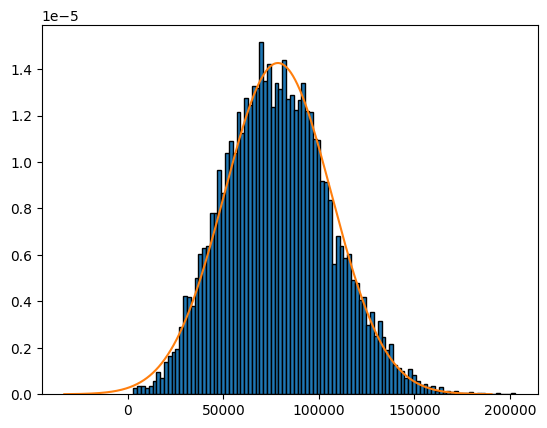

In [475]:
normal_data = normal_distribution(Hypothesis_data,"Total Cognizable IPC crimes")
plt.hist(normal_data, bins=100,density=True, edgecolor='black')
mean = np.mean(normal_data)    
std_dev = np.std(normal_data) 
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
# Calculate the probability density function (PDF)
pdf = norm.pdf(x, mean, std_dev)
# Plot the normal distribution
plt.plot(x, pdf, label=f'N({mean}, {std_dev}²)')
plt.show()

So we Got the Normal Distribution for our Hypothesis Data

# Step 3 : Hypothesis Testing

We did 3 Hypothesis test mainly
1. region wise crime rate
2. sex-ratio wise crime rate
3. literacy and alcohol

Hypothesis 1.

 Creating a random set of 10 states in the North-Central(NC) region and the South-East(SE) region, we found the difference in the means of their crimes. Using this we found the Z statistic value for this test. The hypotheis is that difference in the mean is 0. 

In plain English
Null Hypothesis: The Average crime rate is equal in both NC(18)  and SE(17)  regions. 

Alternate Hypothesis: The Average crime rate in NC regions is more than SE regions.

In statistic 
Null Hypothesis: μ_NC = μ_SE

Alternate Hypothesis: μ_NC > μ_SE

We are conducting a one-sided test, with significance value of 0.05.
Therefore, the Z-statistic value will be:
Z = (Ybar - Xbar)/std (for this distribution); since mean for this distribution is            hypothesized to be zero. 

 

In [476]:
NorthC_state = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh', 'Delhi', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Rajasthan','Bihar', 'Jharkhand', 'Madhya Pradesh', 'Chhattisgarh', 'West Bengal', 'Sikkim', 'Odisha', 'Daman & Diu','Gujurat']
SouthE_state = ['Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Lakshadweep', 'Puducherry', 'Karnataka', 'Goa', 'Maharashtra','AndamanNicobar','Arunachal Pradesh', 'Assam', 'Nagaland', 'Manipur', 'Mizoram', 'Meghalaya', 'Tripura', 'Dadar and Nagar']
# north = 18 south = 17

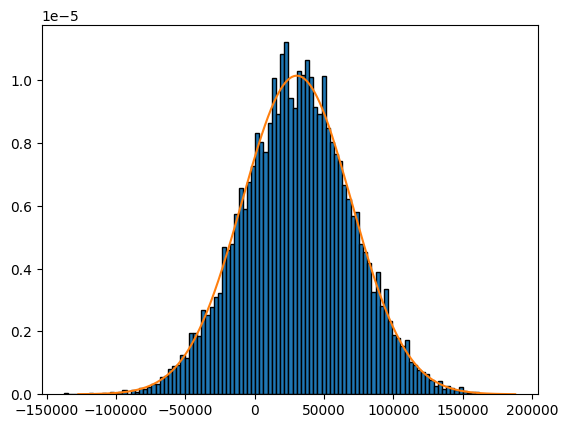

In [ ]:
Data_of_NC = Hypothesis_data[Hypothesis_data['State'].isin(NorthC_state)]
Data_of_SE = Hypothesis_data[Hypothesis_data['State'].isin(SouthE_state)]

sample_NC = normal_distribution(Data_of_NC,"Total Cognizable IPC crimes")
sample_SE = normal_distribution(Data_of_SE,"Total Cognizable IPC crimes")

new  = sample_NC - sample_SE # difference of distribution like Xbar-Ybar
plt.hist(new, bins=100,density=True, edgecolor='black')
mean = np.mean(new)    
std_dev = np.std(new) 
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, label=f'N({mean}, {std_dev}²)')
plt.show()

Fits Normal so we can do the p-value test

In [611]:
y = np.random.choice(sample_NC, size=10, replace=True)
x = np.random.choice(sample_SE, size=10, replace=True)
XminusY = np.mean(y)-np.mean(x)
stdxy = np.sqrt((np.std(sample_NC)**2)/10 + (np.std(sample_SE)**2)/10)
z = XminusY/stdxy
print(z)
p_value = 1 - norm.cdf(z)
print(p_value)

2.254875868008569
0.012070560718340007


for this sepcific Z statistic = 2.254, the P value we got is 0.0120; which is smaller than the significance value that is 0.05. Hence we reject the Null hypothesis.

Hypothesis 2.

In [578]:
percentile = np.percentile(sex_r['Sex-ratio'], 50)
print(percentile) # finding the middle value to divide states into two groups of sex ratio
# dividing regions into two groups on basis of sex ratio
higher_sex = Hypothesis_data[Hypothesis_data['Sex-ratio']>=percentile]
lower_sex = Hypothesis_data[Hypothesis_data['Sex-ratio']<percentile]

946.0


In [579]:
higher_sex.shape,lower_sex.shape

((18, 8), (17, 8))

We divided the states into two sets, one with sex ratio higher than 946 and the other states has sex ratio less than 946. 18 states has higher sex ratio than 946 and 17 has lower sex ratio than 946.

In plain English
Null Hypothesis: The Average crime rate against women in Higher and Lower sex regions is the same. 

Alternate Hypothesis: The Average crime rate in Lower sex ratio regions is not the same as in Higher sex ratio regions

In statistic 
Null Hypothesis: μ_L-SR = μ_H-SR

Alternate Hypothesis: μ_L-SR != μ_H-SR

We are conducting a two-sided test, with significance value of 0.05.
Therefore, the Z-statistic value will be:
Z = (Ybar - Xbar)/std (for this distribution); since mean for this distribution is            hypothesized to be zero. 

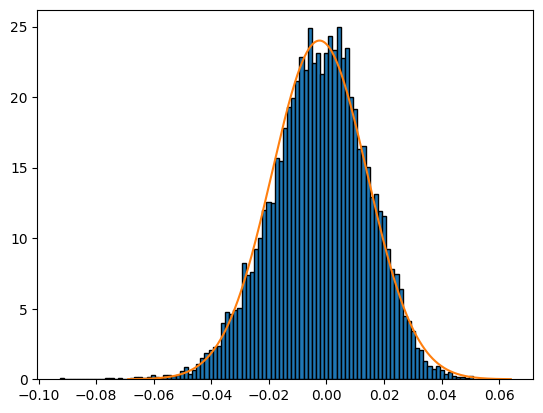

In [571]:
sample_HS = normal_distribution(higher_sex,"Women_Crime_Rate")
sample_LS = normal_distribution(lower_sex,"Women_Crime_Rate")

new  = sample_HS - sample_LS 
plt.hist(new, bins=100,density=True, edgecolor='black')
mean = np.mean(new)    
std_dev = np.std(new) 
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, label=f'N({mean}, {std_dev}²)')
plt.show()

fits Normal we can do p-value test

In [ ]:
y = np.random.choice(sample_LS, size=10, replace=True)
x = np.random.choice(sample_HS, size=10, replace=True)
XminusY = np.mean(y)-np.mean(x)
stdxy = np.sqrt((np.std(sample_HS)**2)/10 + (np.std(sample_LS)**2)/10)
z = XminusY/stdxy
print(z)
p_value = 1 - norm.cdf(abs(z))
print(2*p_value)

2.4937176140931596
0.01264130690569587


for this specific Z statistic = 2.4937, the P value we got is 0.01264; which is smaller than the significance value that is 0.05. Hence we reject the Null hypothesis.

In [580]:
percentile = np.percentile(Hypothesis_data['Literacy Rate'], 50)
print(percentile) # finding the middle value to divide states into two groups of sex ratio
higher_lit = Hypothesis_data[Hypothesis_data['Literacy Rate']>percentile]
lower_lit = Hypothesis_data[Hypothesis_data['Literacy Rate']<=percentile]
higher_lit.shape,lower_lit.shape

86.0


((16, 8), (19, 8))

We divided the states into two sets, based on literacy rate, 16 states have higher literacy rate than 86 and 19 states have lower literacy rate than 86. 

In plain English
Null Hypothesis: The Average alcohol consumption in High and Low Literacy rates is the same.

Alternate Hypothesis: The average alcohol consumption is not the same in Higher and lower literacy states.

In statistic 
Null Hypothesis: μ_L-LR = μ_H-LR

Alternate Hypothesis: μ_H-LR != μ_L-LR

We are conducting a Two-sided test, with significance value of 0.05.
Therefore, the Z-statistic value will be:
Z = (Ybar - Xbar)/std (for this distribution); since mean for this distribution is            hypothesized to be zero. 

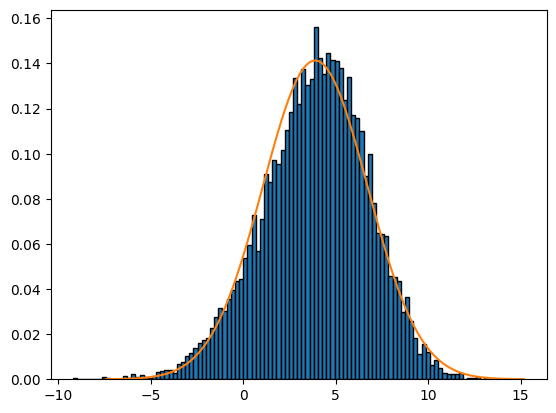

In [484]:
sample_HL = normal_distribution(higher_lit,'total_alcohol')
sample_LL = normal_distribution(lower_lit,'total_alcohol')

new  = sample_HL - sample_LL 
plt.hist(new, bins=100,density=True, edgecolor='black')
mean = np.mean(new)    
std_dev = np.std(new) 
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, label=f'N({mean}, {std_dev}²)')
plt.show()

In [555]:
y = np.random.choice(sample_HL, size=10, replace=True)
x = np.random.choice(sample_LL, size=10, replace=True)
XminusY = np.mean(y)-np.mean(x)
stdxy = np.sqrt((np.std(sample_HL)**2)/10 + (np.std(sample_LL)**2)/10)
z = XminusY/stdxy
print(z)
p_value = 1 - norm.cdf(abs(z))
print(2*p_value)


3.0617231369221054
0.0022006689925204714


for this sepcific Z statistic = 3.0617, the P value we got is 0.0022; which is smaller than the significance value that is 0.05. Hence we reject the Null hypothesis. 

End of Step3

# Step 4 : Regression and Correlation

In [ ]:
def regression_analysis(ax, data, key1, key2): # function to plot the regression line and correlation

    x = data[key1]
    y = data[key2]
    
    # Regression line coefficients
    coef = np.polyfit(x, y, 2)
    corr = x.corr(y)

    # Plotting
    ax.scatter(x, y)
    x = np.linspace(min(x), max(x), 100)
    ax.plot(x, coef[0]*(x**2) + coef[1]*x+coef[2], color='red')
    ax.set_title(f'{key1} vs {key2}\nCorr: {corr:.4f}, y = {coef[0]:.4f}x^2 + {coef[1]:.4f}x + {coef[2]:.4f}')
    ax.set_xlabel(key1)
    ax.set_ylabel(key2)

In [ ]:
def regression_analysis_1(ax, data, key1, key2): # linear regression
    x = data[key1]
    y = data[key2]
    
    # Regression line coefficients
    coef = np.polyfit(x, y, 1)
    corr = x.corr(y)

    # Plotting
    ax.scatter(x, y)
    x = np.linspace(min(x), max(x), 100)
    ax.plot(x, coef[0]*(x) + coef[1], color='green')
    ax.set_title(f'{key1} vs {key2}\nCorr: {corr:.4f}, y = {coef[0]:.4f}x + {coef[0]:.4f}')
    ax.set_xlabel(key1)
    ax.set_ylabel(key2)

first regression of hypothesis_data (Full data_set)

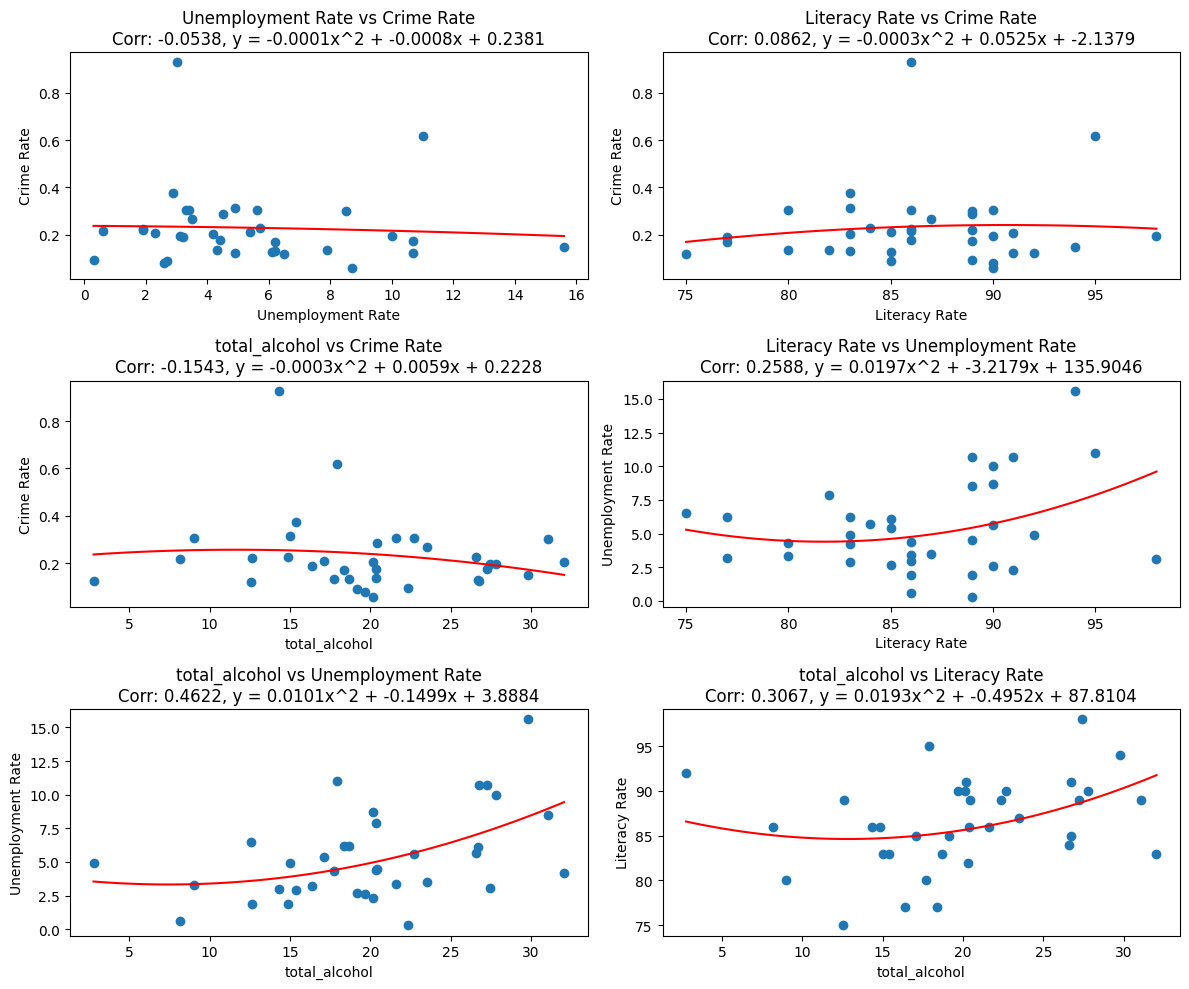

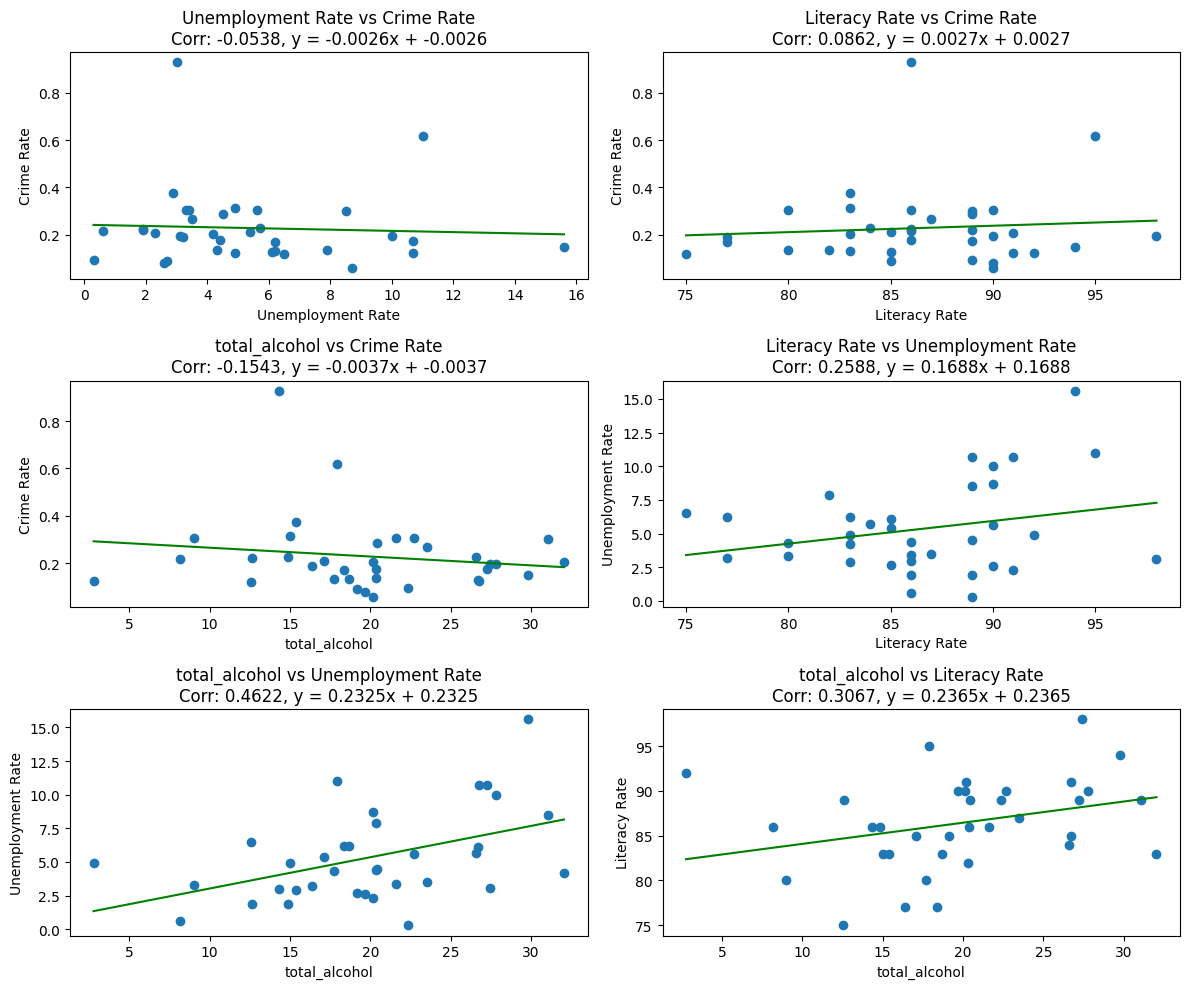

In [566]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier

# Call regression function on subplots
regression_analysis(axs[0], Hypothesis_data, 'Unemployment Rate', 'Crime Rate')
regression_analysis(axs[1], Hypothesis_data, 'Literacy Rate', 'Crime Rate')
regression_analysis(axs[2], Hypothesis_data, 'total_alcohol', 'Crime Rate')
regression_analysis(axs[3], Hypothesis_data, 'Literacy Rate', 'Unemployment Rate')
regression_analysis(axs[4], Hypothesis_data, 'total_alcohol', 'Unemployment Rate')
regression_analysis(axs[5], Hypothesis_data, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier
regression_analysis_1(axs[0], Hypothesis_data, 'Unemployment Rate', 'Crime Rate')
regression_analysis_1(axs[1], Hypothesis_data, 'Literacy Rate', 'Crime Rate')
regression_analysis_1(axs[2], Hypothesis_data, 'total_alcohol', 'Crime Rate')
regression_analysis_1(axs[3], Hypothesis_data, 'Literacy Rate', 'Unemployment Rate')
regression_analysis_1(axs[4], Hypothesis_data, 'total_alcohol', 'Unemployment Rate')
regression_analysis_1(axs[5], Hypothesis_data, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

We tried to fit Linear curves which didnt really seem to follow the data. Hence we tried a quadrartic curve to make the data fall near the curve more than the linear curve.

Of all the possible combinations tried above, total_alchol vs unemployment Rate gives the best correlation which is 0.4622 which implies it has quite a weak linear relation with each other. 

The other combinations doesnt give a decent correlation to even imply a linear realtion they are near 0.3 or lower than 0.3; hence we can say that there is not linear realtion between the two random variables. 

Second regression on North-central and South-East seperately

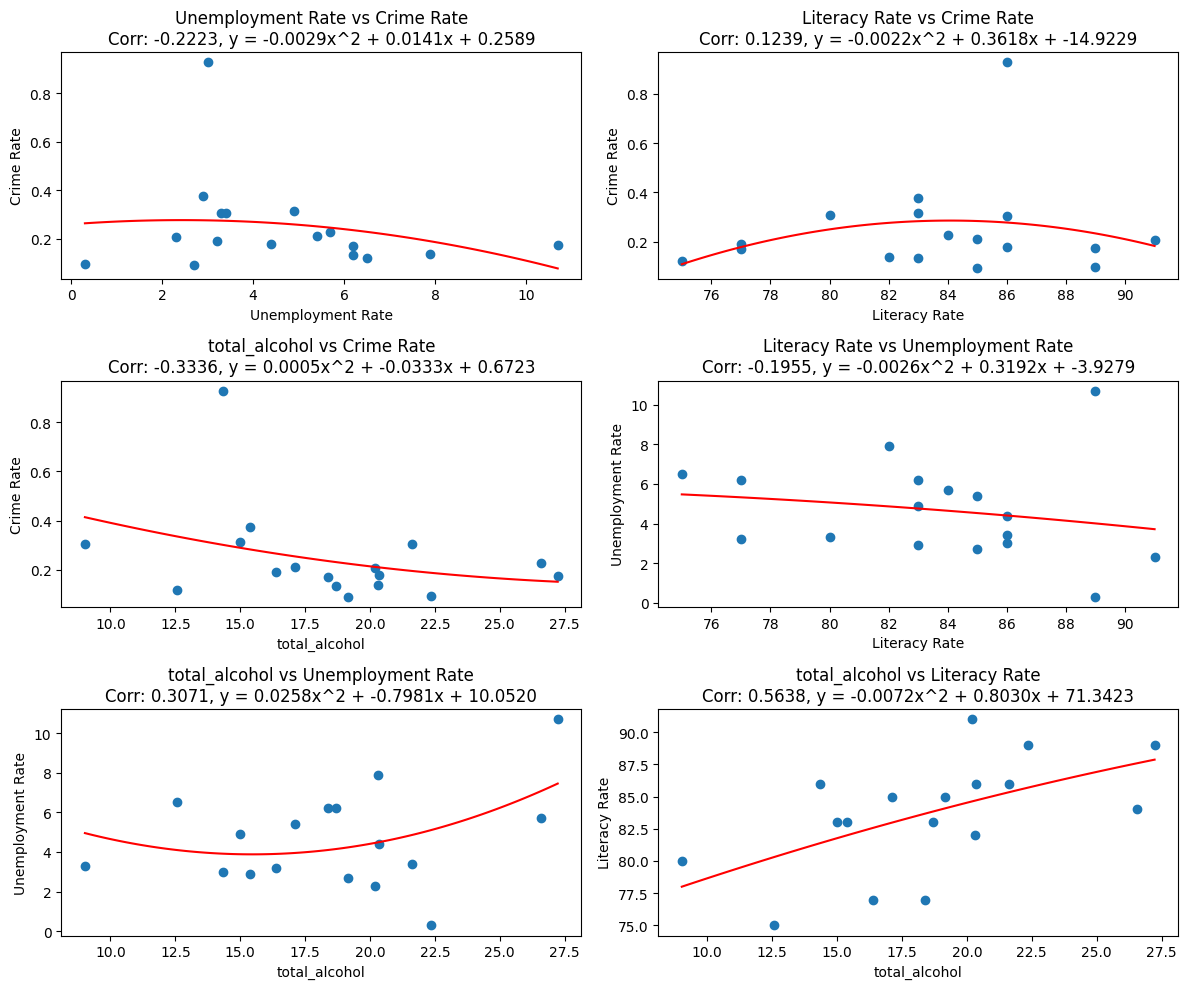

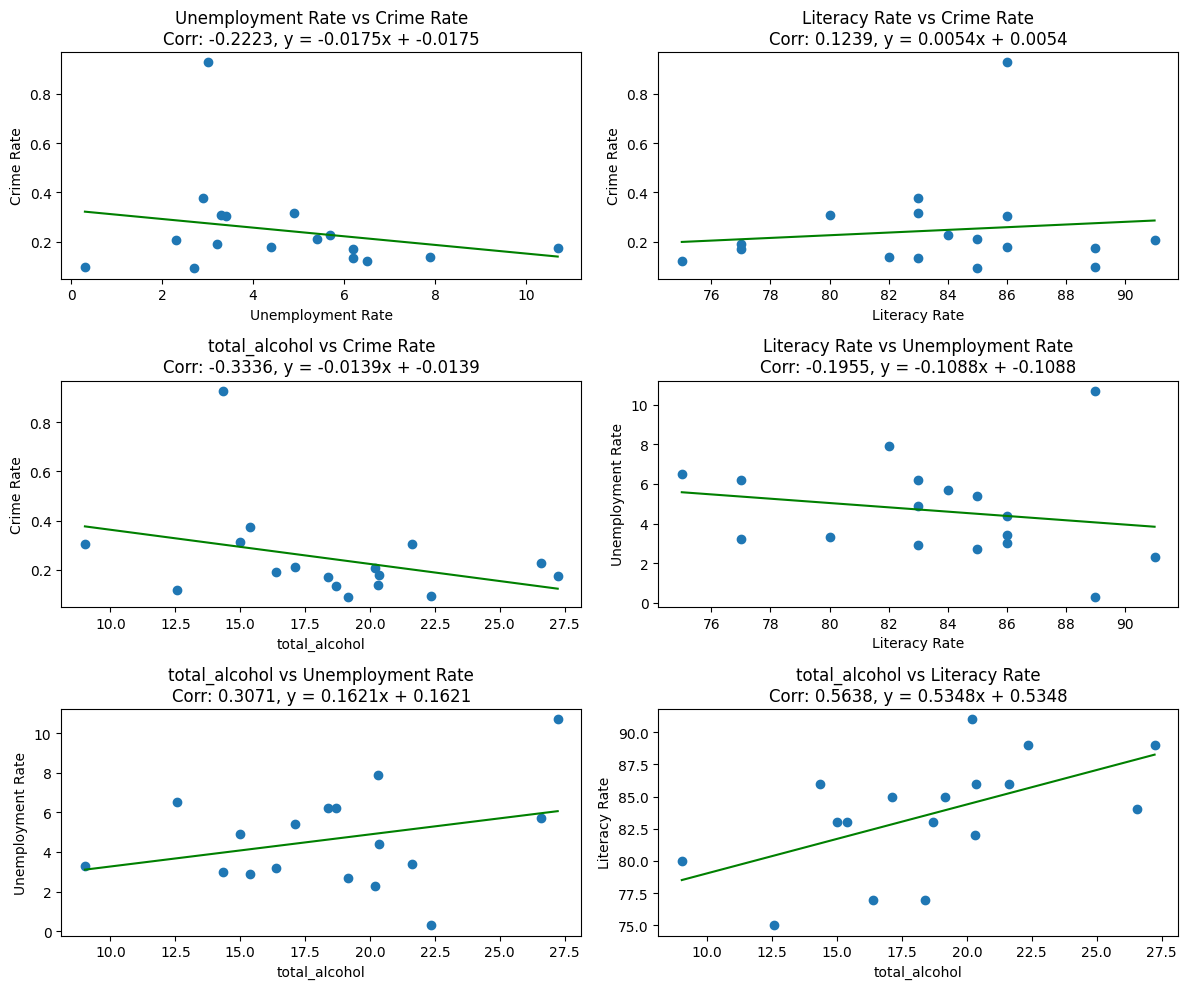

In [ ]:
# Create 2x2 subplot grid  # for North
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier

# Call regression function on subplots
regression_analysis(axs[0], Data_of_NC, 'Unemployment Rate', 'Crime Rate')
regression_analysis(axs[1], Data_of_NC, 'Literacy Rate', 'Crime Rate')
regression_analysis(axs[2], Data_of_NC, 'total_alcohol', 'Crime Rate')
regression_analysis(axs[3], Data_of_NC, 'Literacy Rate', 'Unemployment Rate')
regression_analysis(axs[4],Data_of_NC, 'total_alcohol', 'Unemployment Rate')
regression_analysis(axs[5], Data_of_NC, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier
regression_analysis_1(axs[0], Data_of_NC, 'Unemployment Rate', 'Crime Rate')
regression_analysis_1(axs[1], Data_of_NC, 'Literacy Rate', 'Crime Rate')
regression_analysis_1(axs[2], Data_of_NC, 'total_alcohol', 'Crime Rate')
regression_analysis_1(axs[3], Data_of_NC, 'Literacy Rate', 'Unemployment Rate')
regression_analysis_1(axs[4],Data_of_NC, 'total_alcohol', 'Unemployment Rate')
regression_analysis_1(axs[5], Data_of_NC, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

These graphs are of the type as the previous ones, but these graphs are of not entire nation but only of the states in NC region.

Of all the possible combinations tried above;
    - total_alchol vs Literacy Rate gives the best correlation which is 0.5638 which implies it has quite a weak linear relation with each other. 
    - total crime rate vs total alcohol gives an even weaker linear correlation of -0.3336 but a more alcohol consumption is associated with lesser crimes (weak). 

The other combinations doesnt give a decent correlation to even imply a linear realtion they are near 0.3 or lower than 0.3; hence we can say that there is not linear realtion between the two random variables. 

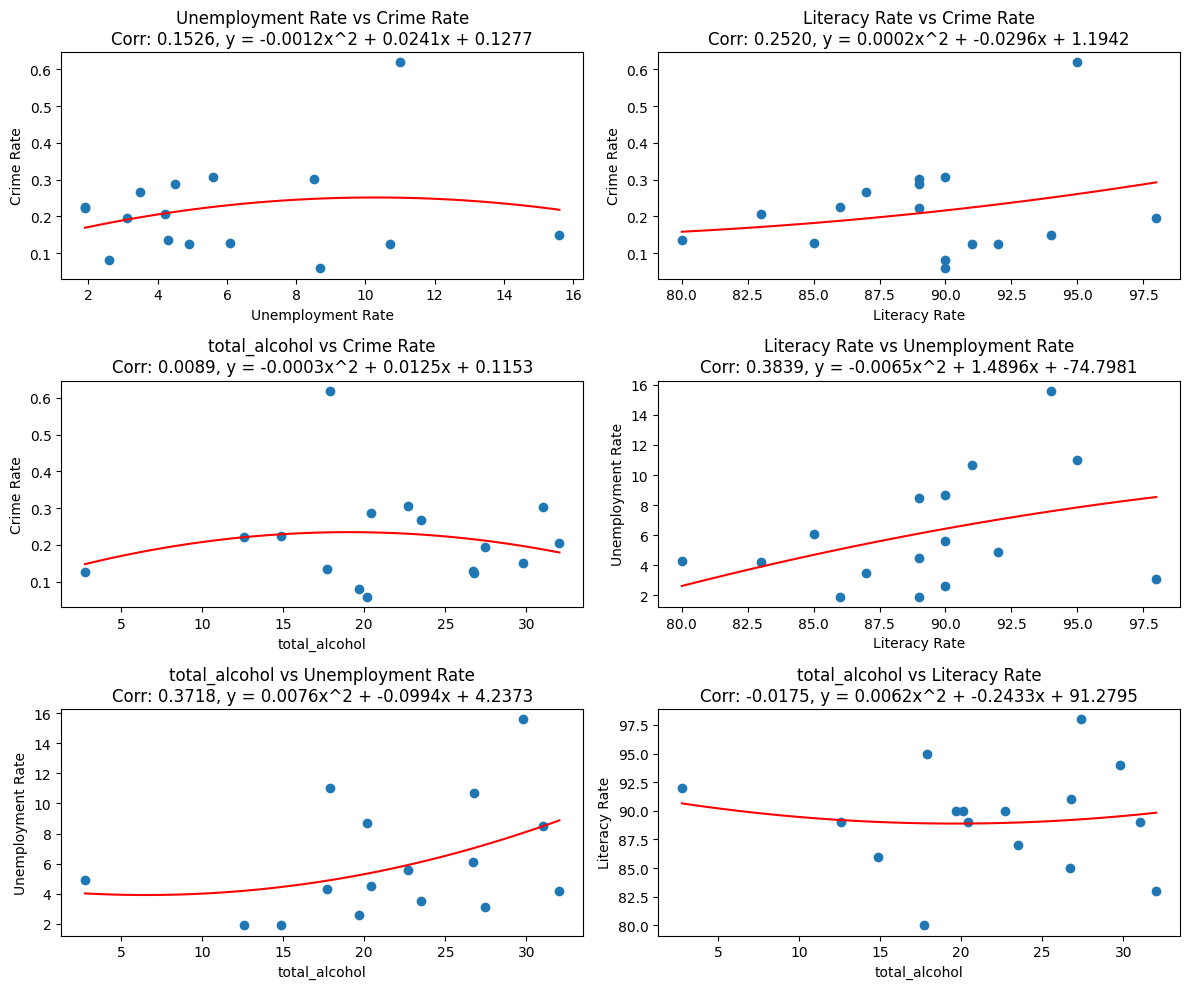

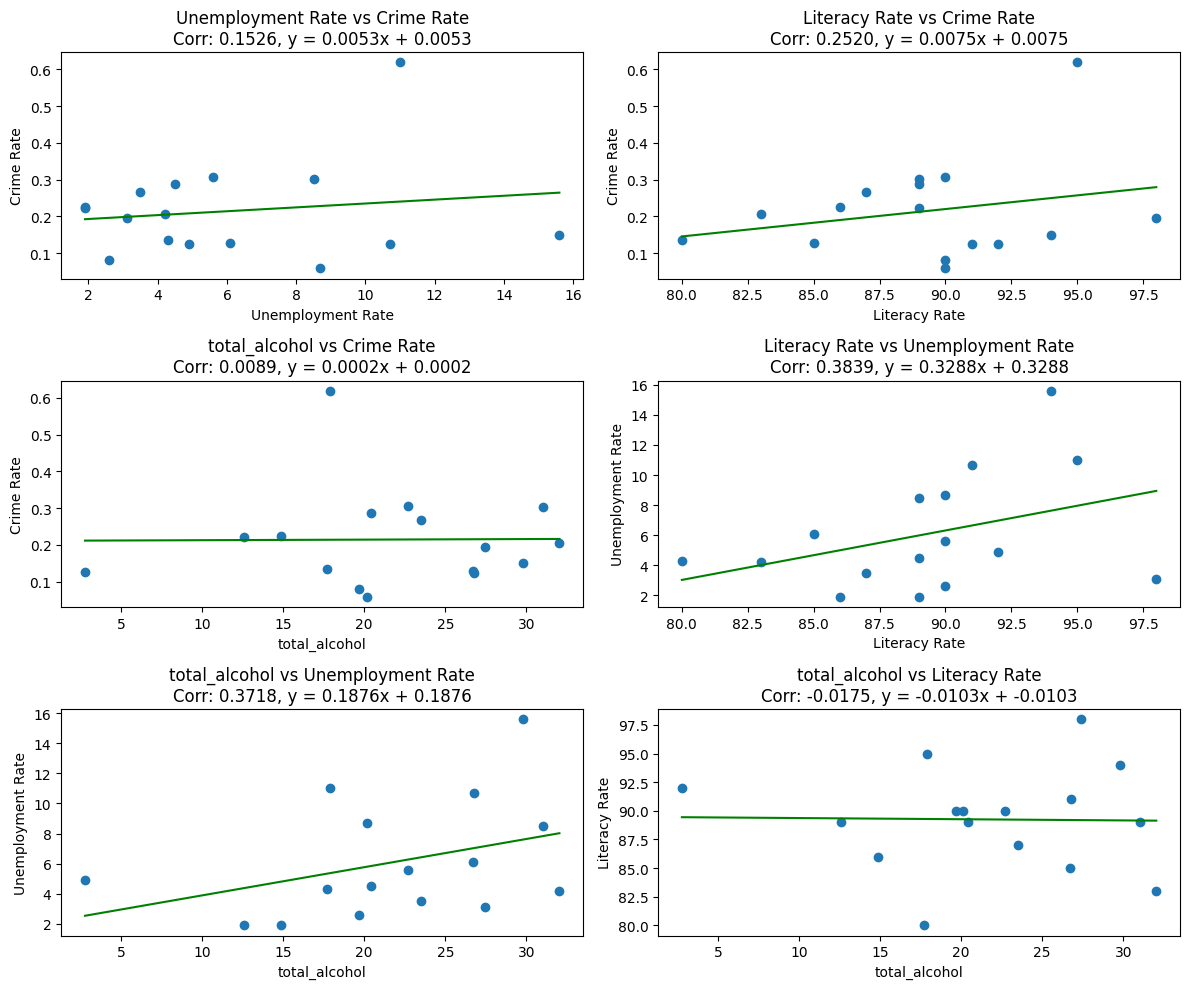

In [ ]:
# Create 2x2 subplot grid # for South
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier

# Call regression function on subplots
regression_analysis(axs[0], Data_of_SE, 'Unemployment Rate', 'Crime Rate')
regression_analysis(axs[1], Data_of_SE, 'Literacy Rate', 'Crime Rate')
regression_analysis(axs[2], Data_of_SE, 'total_alcohol', 'Crime Rate')
regression_analysis(axs[3], Data_of_SE, 'Literacy Rate', 'Unemployment Rate')
regression_analysis(axs[4],Data_of_SE, 'total_alcohol', 'Unemployment Rate')
regression_analysis(axs[5], Data_of_SE, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier
regression_analysis_1(axs[0], Data_of_SE, 'Unemployment Rate', 'Crime Rate')
regression_analysis_1(axs[1], Data_of_SE, 'Literacy Rate', 'Crime Rate')
regression_analysis_1(axs[2], Data_of_SE, 'total_alcohol', 'Crime Rate')
regression_analysis_1(axs[3], Data_of_SE, 'Literacy Rate', 'Unemployment Rate')
regression_analysis_1(axs[4],Data_of_SE, 'total_alcohol', 'Unemployment Rate')
regression_analysis_1(axs[5], Data_of_SE, 'total_alcohol', 'Literacy Rate')
plt.tight_layout()
plt.show()

These graphs are of the type as the previous ones, but these graphs are of not entire nation but only of the states in SE region.

Of all the possible combinations tried above;
    -Literacy Rate vs Unemployment rate gives the best correlation which is 0.3839 which implies it has quite a weak linear relation with each other, but a general increase in unemployment is seen as the Literacy rate increases (very weak). 
    - alchol consumption vs unemployment rate gives an even weaker linear correlation of 0.3718 but a more alcohol consumption is associated with unemployment (very weak). 

The other combinations doesnt give a decent correlation to even imply a linear realtion they are near 0.3 or lower than 0.3; hence we can say that there is not linear realtion between the two random variables. 

One Full data Set regression on Sex-ratio and women crimerate( crimes faced by women)
One Full data set regression on Literacy rate and alcohol consumption. 

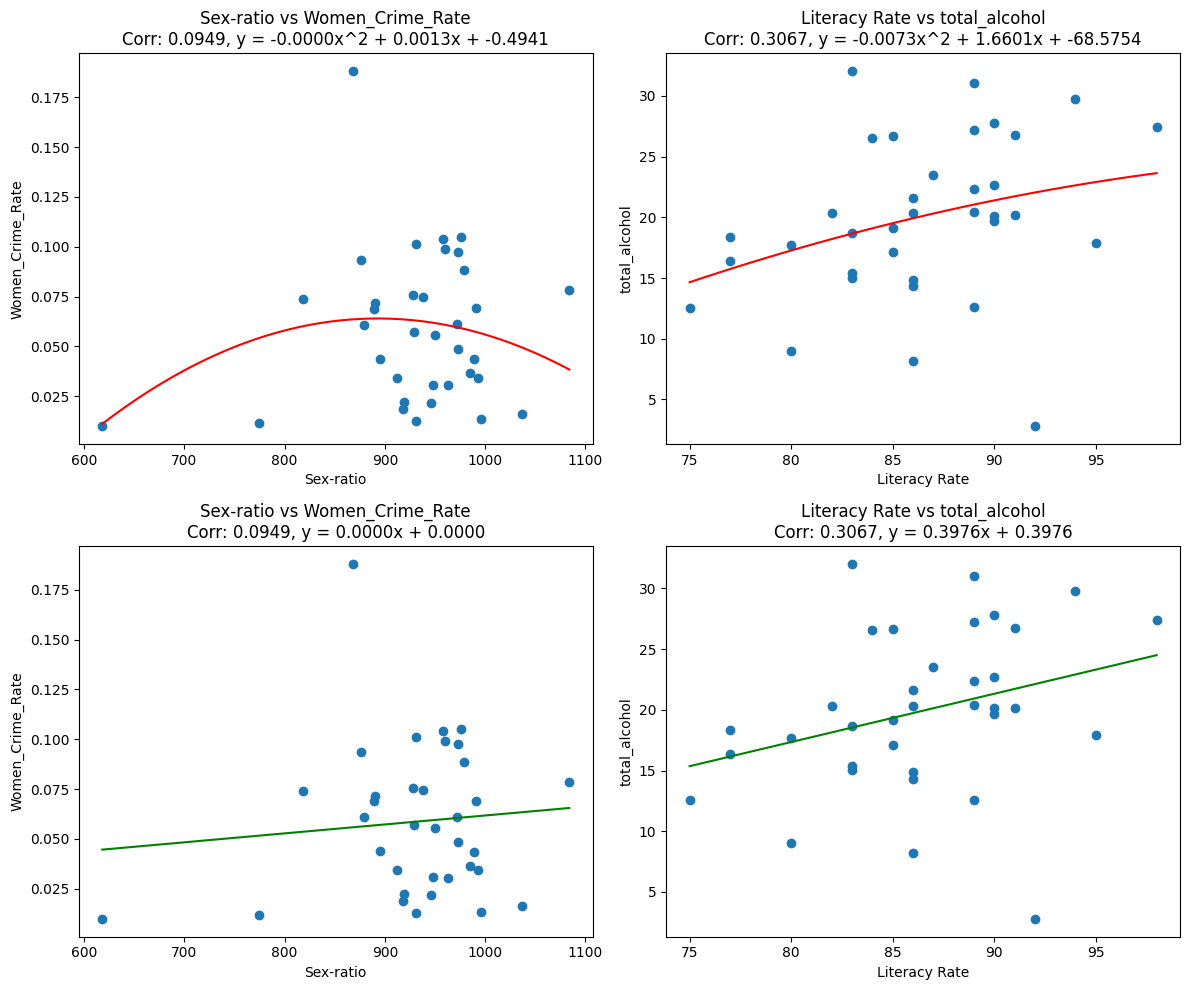

In [584]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Make indexing easier
regression_analysis(axs[0] ,Hypothesis_data, 'Sex-ratio', 'Women_Crime_Rate')
regression_analysis(axs[1] ,Hypothesis_data, 'Literacy Rate', 'total_alcohol')
regression_analysis_1(axs[2] ,Hypothesis_data, 'Sex-ratio', 'Women_Crime_Rate')
regression_analysis_1(axs[3] ,Hypothesis_data, 'Literacy Rate', 'total_alcohol')
plt.tight_layout()
plt.show()

There is no Linear Correlation betwen Sex Ratio and Crime Rate Against Women. But there is a correlation of 0.3067 betwen Literacy rate and Total alcohol consumption; this is a very weak linear correlation but a general trend of increased literacy rate is associated with increased consumption as seen in the graphs. 

# RESULTS and CONCLUSIONS:
From the analysis above, None of the parameters are Linearly correlated. However we hypothesized few relations as follows: 

1. The average Crime rate relation with North-Central and South-East region
2. Crime rate against women in relation with the sex ratio
3. Alcohol consumption in relation with Literacy rate

upon performing the hypothesis test, and many hypothesis rejection's later, we found that
1. The average Crime rate in the NC and SE regions are not equal - and result suggesting that crime rate is more in the NC regions than the SE regions. 
2. The crime rate against women is different in states with different sex ratios.
3. Alcohol consumption is different in states with different literacy rates. 


